# Import Required Packages

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import scipy.stats as stats

from dmba import regressionSummary, exhaustive_search
from dmba import adjusted_r2_score, AIC_score, BIC_score

import seaborn as sns

import matplotlib.pylab as plt
%matplotlib inline

no display found. Using non-interactive Agg backend


# Upload data set for analysis

In [2]:
# Create data frame from the original data set.  
udemy_df = pd.read_csv('udemy.csv')
youtube_df = pd.read_csv('youtube.csv')
linkedin_instructor_df = pd.read_csv('linkedin-instructor.csv')

In [3]:
# Merge dataframes based on the common key (index_number)
combined_df = pd.merge(udemy_df, youtube_df, on='index_number')
combined_df = pd.merge(combined_df, linkedin_instructor_df, on='index_number')

# Sort the dataframe by index_number in ascending order
combined_df = combined_df.sort_values(by='index_number', ascending=True)

In [4]:
# Determine and display dimensions of data frame. 
print('Number of rows and columns in data set:', 
      combined_df.shape)

Number of rows and columns in data set: (408, 14)


In [5]:
# Display the first 5 rows of the dataframe. 
combined_df.head()

,index_number,instructor_rating_udemy,number_of_reviews_udemy,number_of_students_udemy,number_of_courses_udemy,subscriber_count_youtube,videos_posted_count_youtube,channel_average_view_count_youtube,featured_video_comments_count_youtube,followers_count_linkedin,number_of_connections_mapped_linkedin,average_reaction_count_linkedin,average_comment_count_linkedin,average_post_frequency_linkedin
37,3,4.5,124359,689012,37,24500,544,3524395,5,7764,1,96.67,3.67,27.29
394,4,4.5,9960,160096,23,3700,1200,193751,2,1015,1,0.33,0.00,6.33
252,5,4.3,61336,960625,326,5700,526,561368,0,25244,1,3.00,1.33,1.00
216,7,4.3,14383,221295,108,134000,2400,8750786,15,9946,1,0.00,0.00,1.00
334,9,4.6,223696,1377327,74,72100,734,3336451,38,38002,1,52.67,0.67,5.00


In [6]:
# Display the last five rows of the dataframe.
combined_df.tail()

,index_number,instructor_rating_udemy,number_of_reviews_udemy,number_of_students_udemy,number_of_courses_udemy,subscriber_count_youtube,videos_posted_count_youtube,channel_average_view_count_youtube,featured_video_comments_count_youtube,followers_count_linkedin,number_of_connections_mapped_linkedin,average_reaction_count_linkedin,average_comment_count_linkedin,average_post_frequency_linkedin
266,2957,4.5,808,30236,3,10500,130,1512474,0,297,0,3.00,0.33,101.47
225,2972,4.6,298,6722,21,42700,762,53291139,7,26,0,1.00,0.00,1.33
398,2979,4.3,312,21990,3,131,53,15691,0,1304,1,77.33,2.33,243.52
283,2994,4.4,1356,13898,3,77100,1100,12657473,49,2176,1,10.67,1.33,1.00
185,3000,4.7,2673,17288,3,48,11,1226,0,284,0,0.00,0.00,121.76


# Data exploration, cleanup, and preprocessing

In [7]:
# Display the column names.
print('Original column titles:')
combined_df.columns

Original column titles:


Index(['index_number', 'instructor_rating_udemy', 'number_of_reviews_udemy',
       'number_of_students_udemy', 'number_of_courses_udemy',
       'subscriber_count_youtube', 'videos_posted_count_youtube',
       'channel_average_view_count_youtube',
       'featured_video_comments_count_youtube', 'followers_count_linkedin',
       'number_of_connections_mapped_linkedin',
       'average_reaction_count_linkedin', 'average_comment_count_linkedin',
       'average_post_frequency_linkedin'],
      dtype='object')

In [8]:
#dropping the column index_number
combined_df = combined_df.drop(columns=['index_number'])

In [9]:
# Display column data types. 
combined_df.dtypes

instructor_rating_udemy                  float64
number_of_reviews_udemy                    int64
number_of_students_udemy                   int64
number_of_courses_udemy                    int64
subscriber_count_youtube                   int64
videos_posted_count_youtube                int64
channel_average_view_count_youtube         int64
featured_video_comments_count_youtube      int64
followers_count_linkedin                   int64
number_of_connections_mapped_linkedin      int64
average_reaction_count_linkedin          float64
average_comment_count_linkedin           float64
average_post_frequency_linkedin          float64
dtype: object

In [31]:
# Use describe() function to display column statistics for the entire data set. 
np.round(combined_df.describe(), decimals=2)

,instructor_rating_udemy,number_of_reviews_udemy,number_of_students_udemy,number_of_courses_udemy,subscriber_count_youtube,videos_posted_count_youtube,channel_average_view_count_youtube,featured_video_comments_count_youtube,followers_count_linkedin,number_of_connections_mapped_linkedin,average_reaction_count_linkedin,average_comment_count_linkedin,average_post_frequency_linkedin
count,408.00,408.00,408.00,408.00,408.00,408.00,4.080000e+02,408.00,408.00,408.00,408.00,408.00,408.00
mean,4.36,25101.06,151221.36,15.98,45979.96,247.51,4.052880e+06,17.91,8270.36,0.86,250.20,19.88,66.11
std,0.27,91552.41,367656.71,37.10,237536.12,478.79,1.848656e+07,71.04,20547.01,0.35,1193.15,115.47,75.49
min,3.40,8.00,107.00,1.00,2.00,1.00,3.400000e+01,0.00,2.00,0.00,0.00,0.00,0.33
25%,4.28,626.50,10035.75,3.00,559.25,35.00,4.165900e+04,0.00,907.50,1.00,2.33,0.00,7.00
50%,4.40,2582.00,36930.50,6.00,3300.00,110.50,2.422710e+05,0.00,2284.50,1.00,12.33,0.67,32.77
75%,4.50,11772.00,111867.25,15.00,18500.00,274.50,1.630814e+06,7.00,5895.75,1.00,49.67,4.00,99.11
max,5.00,986290.00,2799825.00,455.00,3500000.00,6900.00,2.464784e+08,842.00,239668.00,1.00,14165.00,1433.33,334.84


In [11]:
# Identify predictors and outcome of the regression model.
predictors = ['instructor_rating_udemy', 'number_of_reviews_udemy','number_of_courses_udemy', 'subscriber_count_youtube',
              'videos_posted_count_youtube', 'channel_average_view_count_youtube','featured_video_comments_count_youtube',
              'followers_count_linkedin', 'number_of_connections_mapped_linkedin','average_reaction_count_linkedin',
             'average_comment_count_linkedin','average_post_frequency_linkedin']
outcome = 'number_of_students_udemy'

print('Predictor Variables:', predictors)

print('Outcome Variable:', outcome)

Predictor Variables: ['instructor_rating_udemy', 'number_of_reviews_udemy', 'number_of_courses_udemy', 'subscriber_count_youtube', 'videos_posted_count_youtube', 'channel_average_view_count_youtube', 'featured_video_comments_count_youtube', 'followers_count_linkedin', 'number_of_connections_mapped_linkedin', 'average_reaction_count_linkedin', 'average_comment_count_linkedin', 'average_post_frequency_linkedin']
Outcome Variable: number_of_students_udemy


# Assumption 1 of Multiple Linear Regression - Linearity

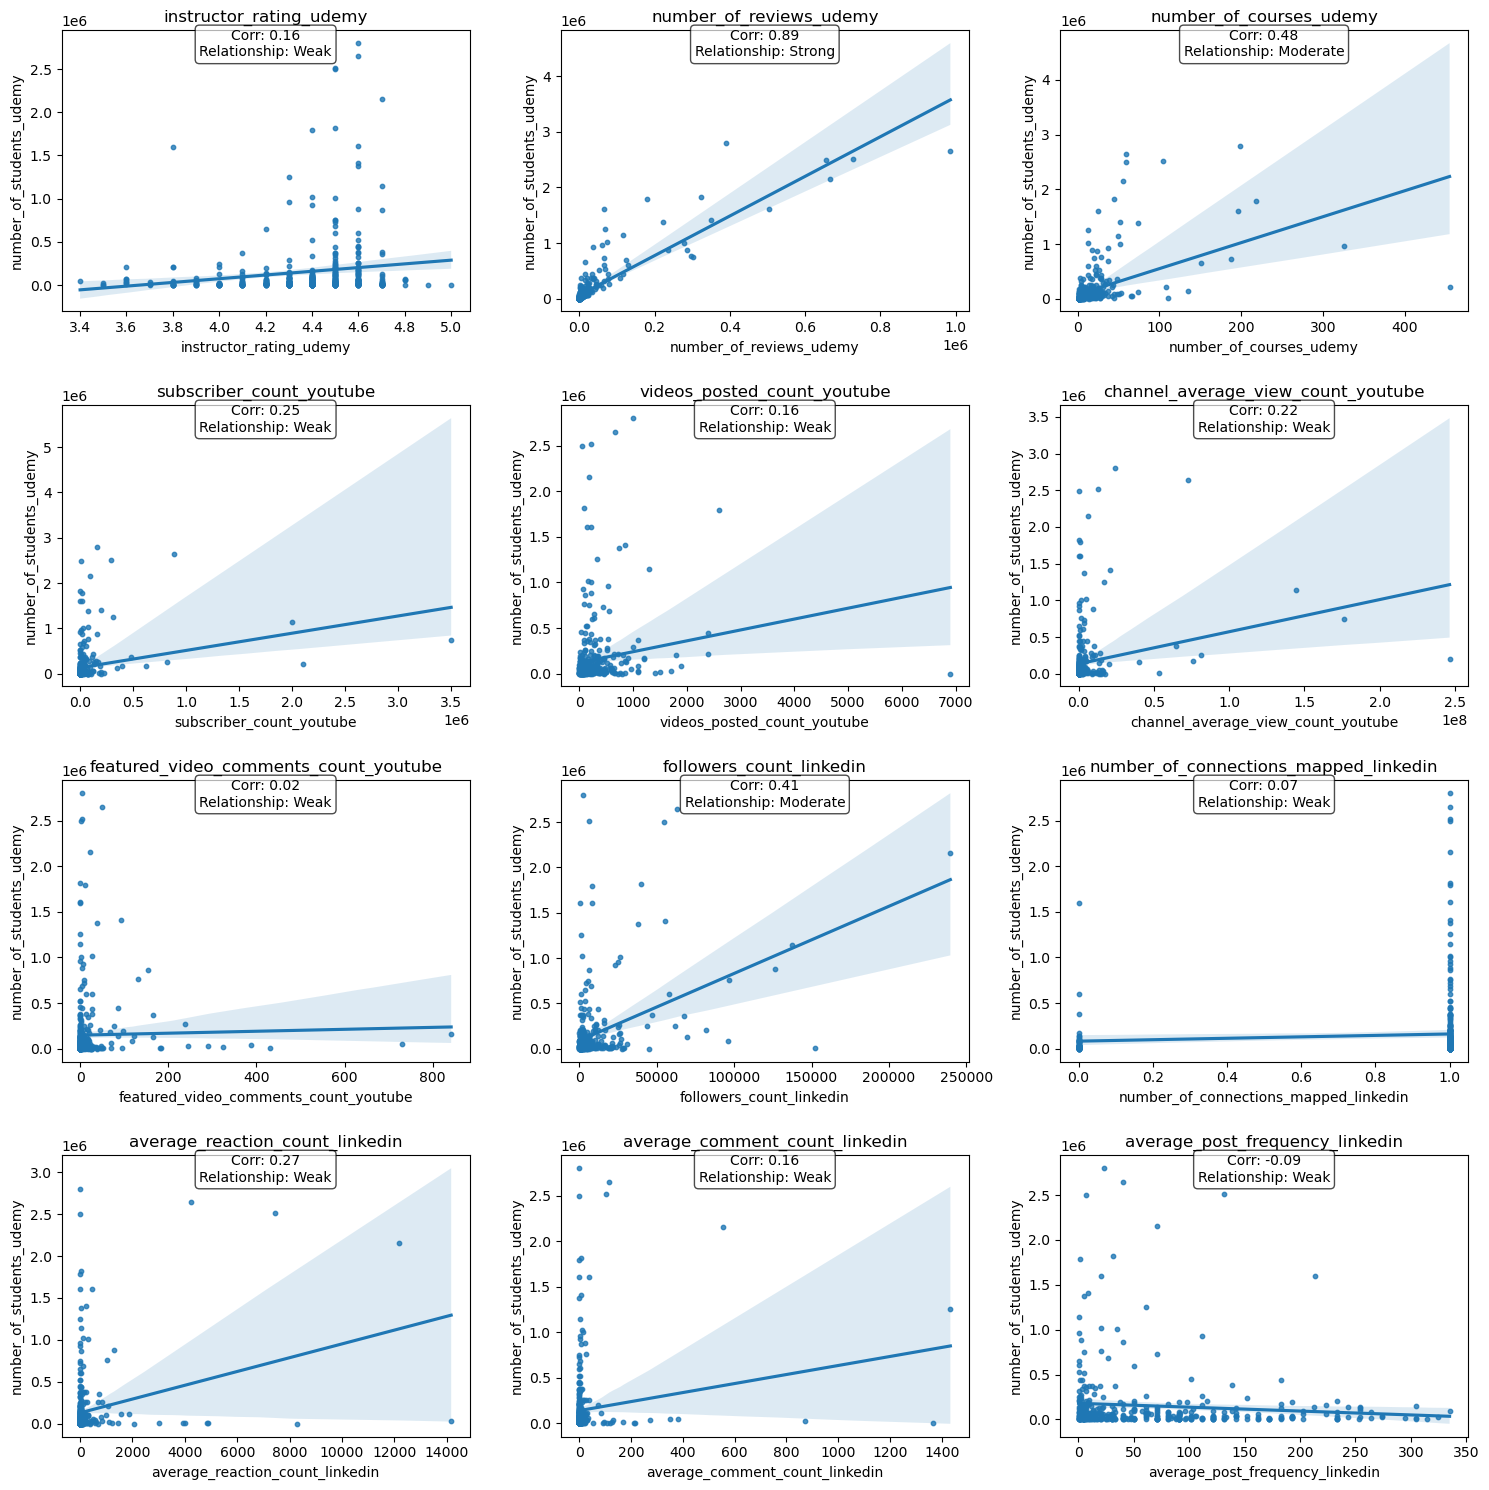

In [12]:
# Calculate the correlation matrix
correlation_matrix = combined_df[predictors + [outcome]].corr()

# Get the correlations with the outcome variable
correlations_with_outcome = correlation_matrix[outcome][:-1]

# Define a function to categorize relationships
def categorize_relationship(correlation):
    if abs(correlation) >= 0.7:
        return "Strong"
    elif abs(correlation) >= 0.3:
        return "Moderate"
    else:
        return "Weak"

# Set the number of columns in the grid layout
num_cols = 3

# Calculate the number of rows needed based on the number of predictors
num_rows = (len(predictors) + num_cols - 1) // num_cols

# Create subplots in a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes to simplify indexing
axes = axes.flatten()

# Loop through predictors and create scatter plots with regression lines
for i, predictor in enumerate(predictors):
    sns.regplot(x=predictor, y=outcome, data=combined_df, ax=axes[i], scatter_kws={'s': 10})
    correlation = correlations_with_outcome[predictor]
    relationship = categorize_relationship(correlation)
    
    # Annotate the plot with correlation and relationship info
    axes[i].annotate(f'Corr: {correlation:.2f}\nRelationship: {relationship}', 
                     xy=(0.5, 0.95), xycoords='axes fraction',
                     ha='center', va='center',
                     bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

    axes[i].set_title(predictor)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# Assumption 2 of Multiple Linear Regression - Multicollinearity

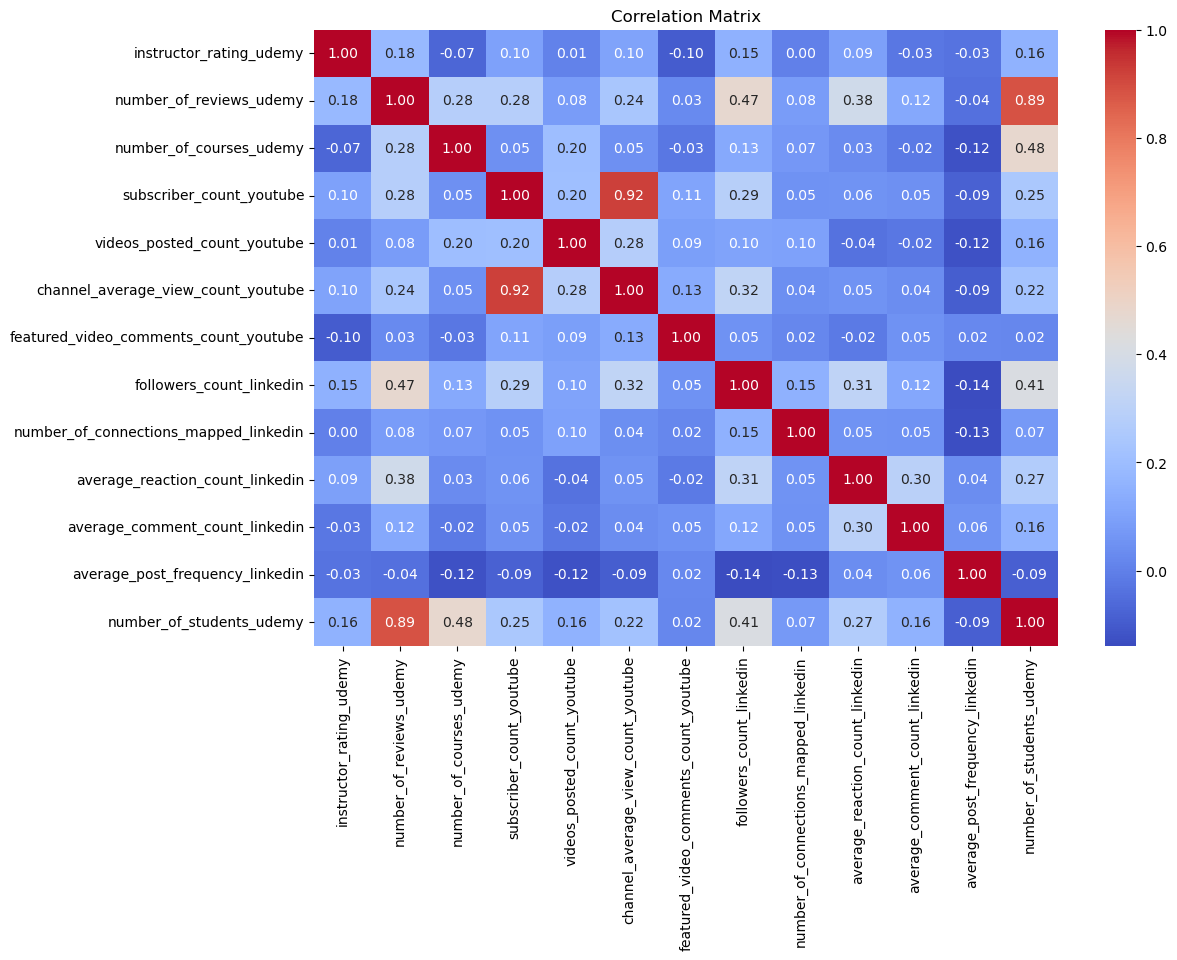

In [13]:
# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Assumption 3 of Multiple Linear Regression - Normality of Variables

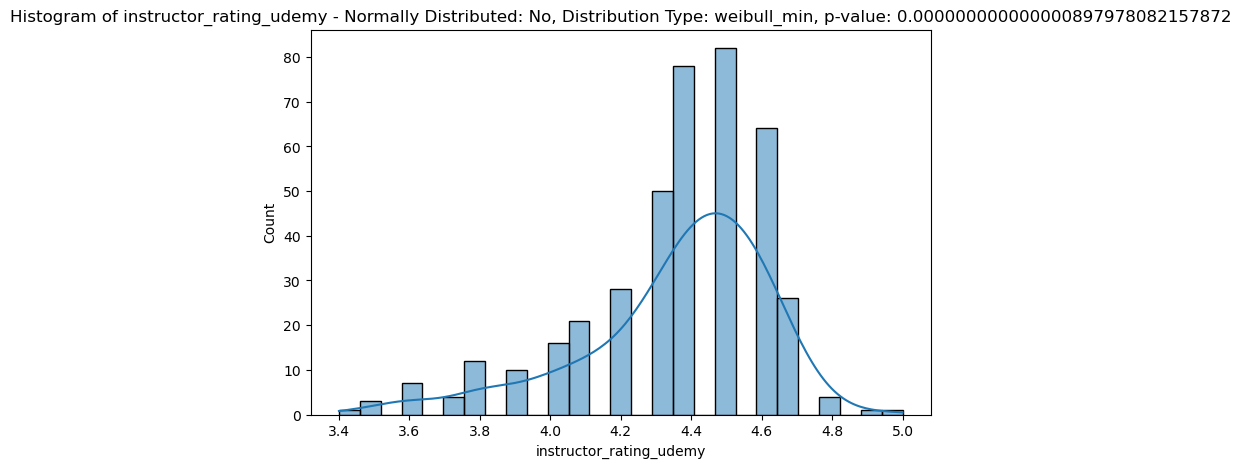

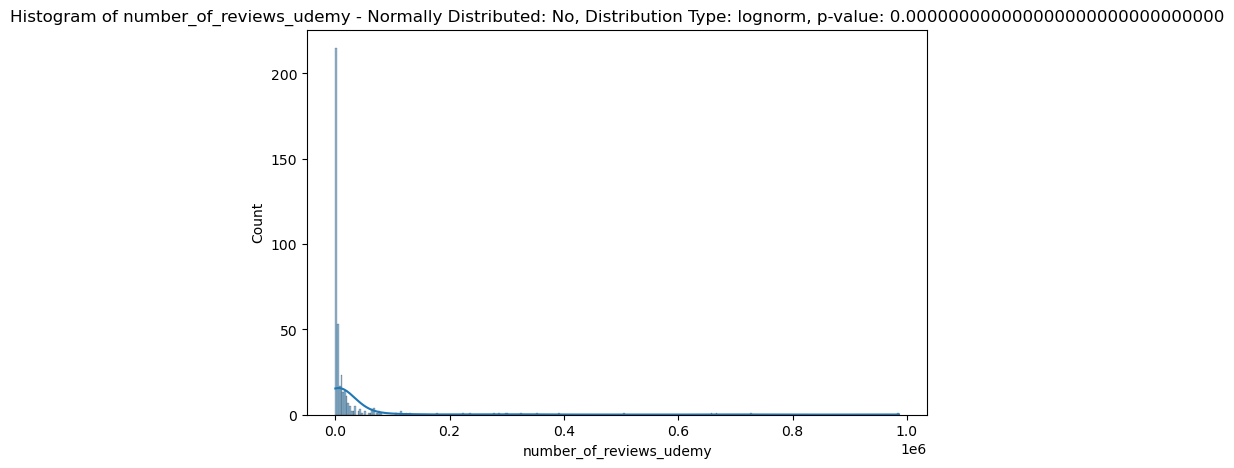

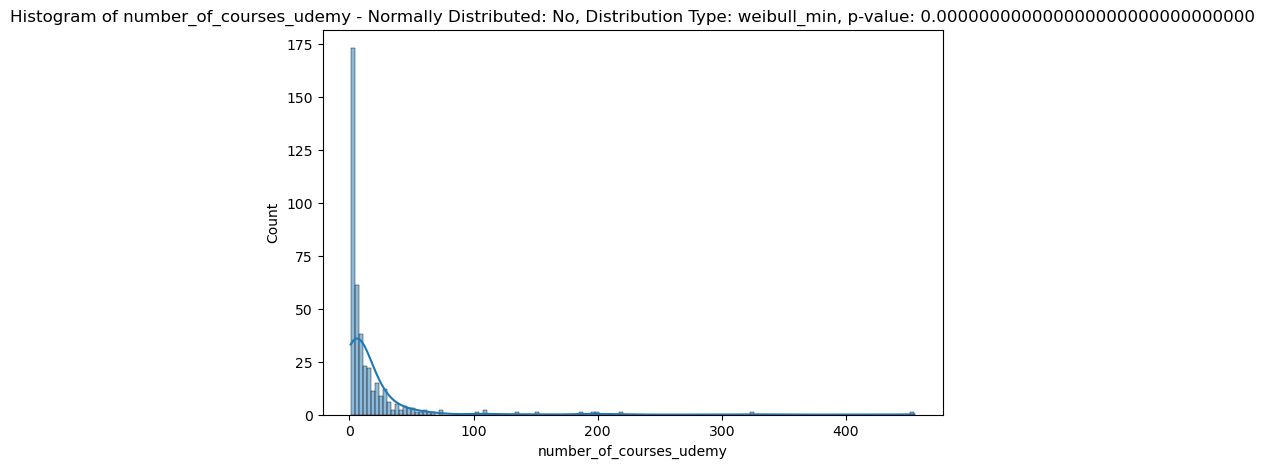

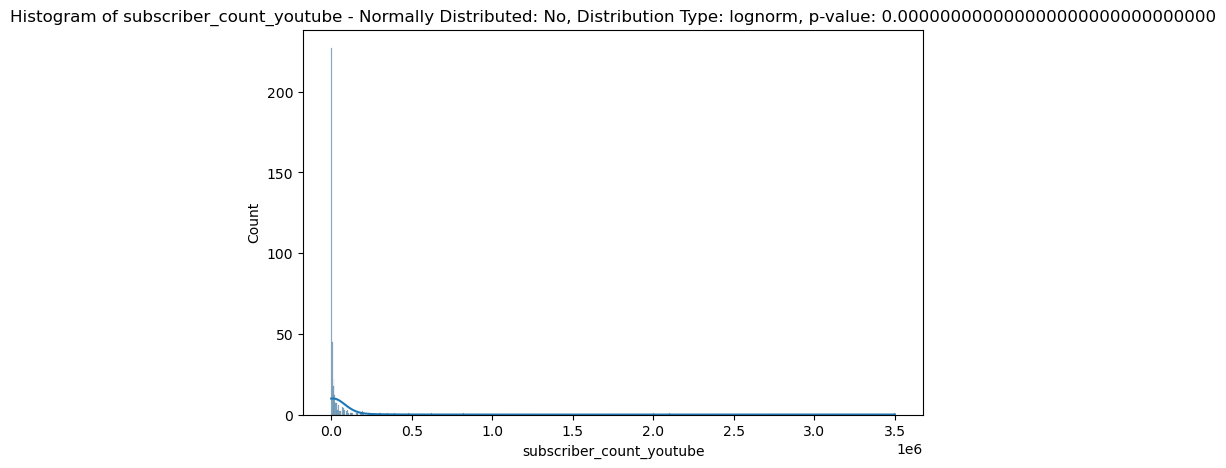

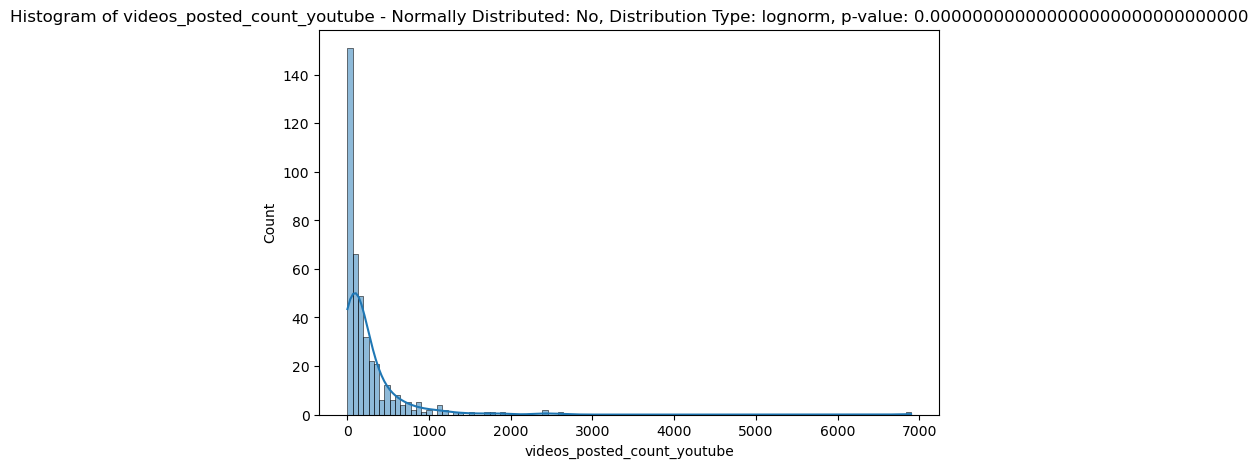

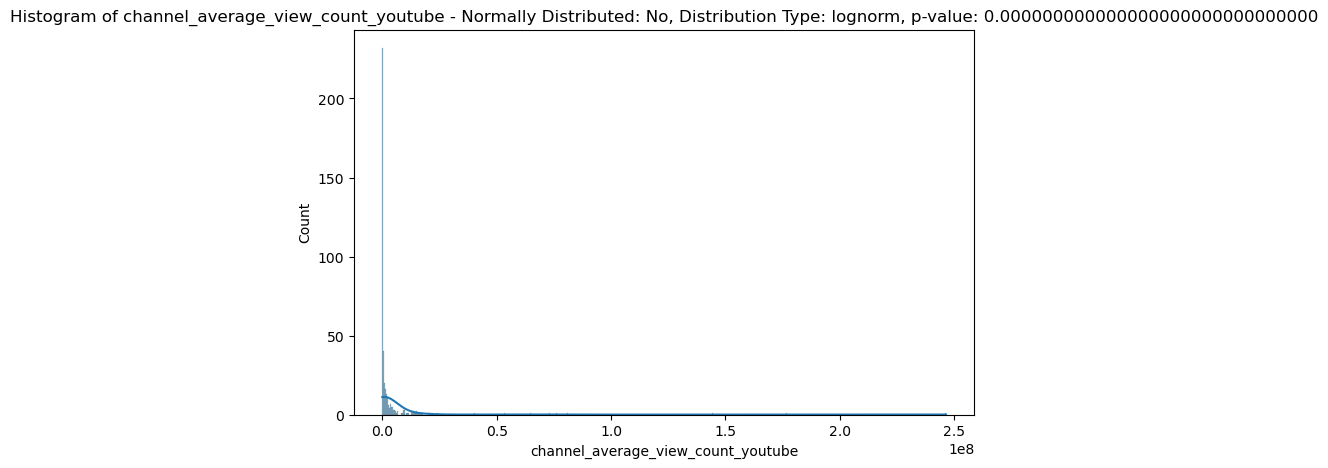

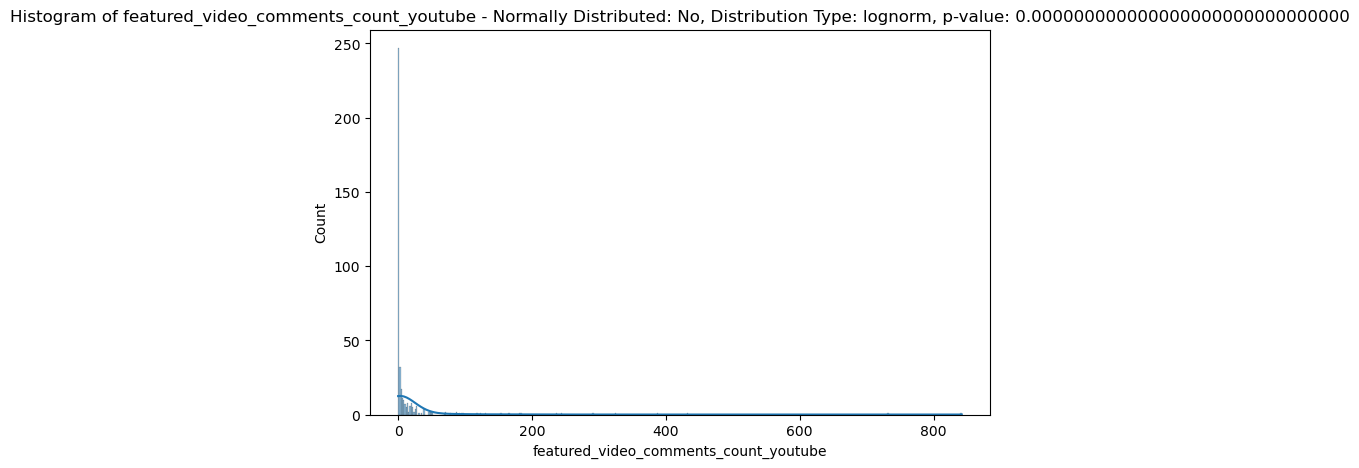

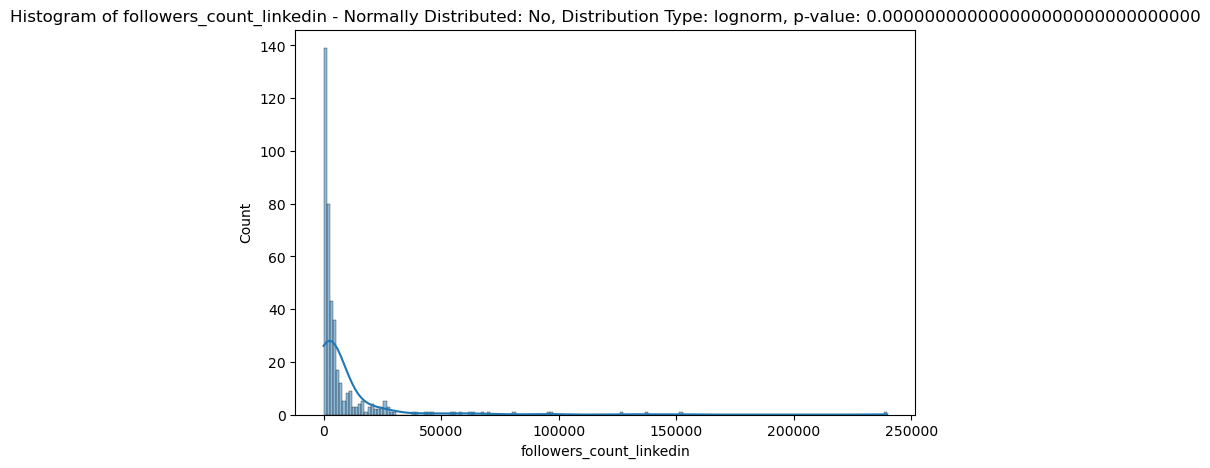

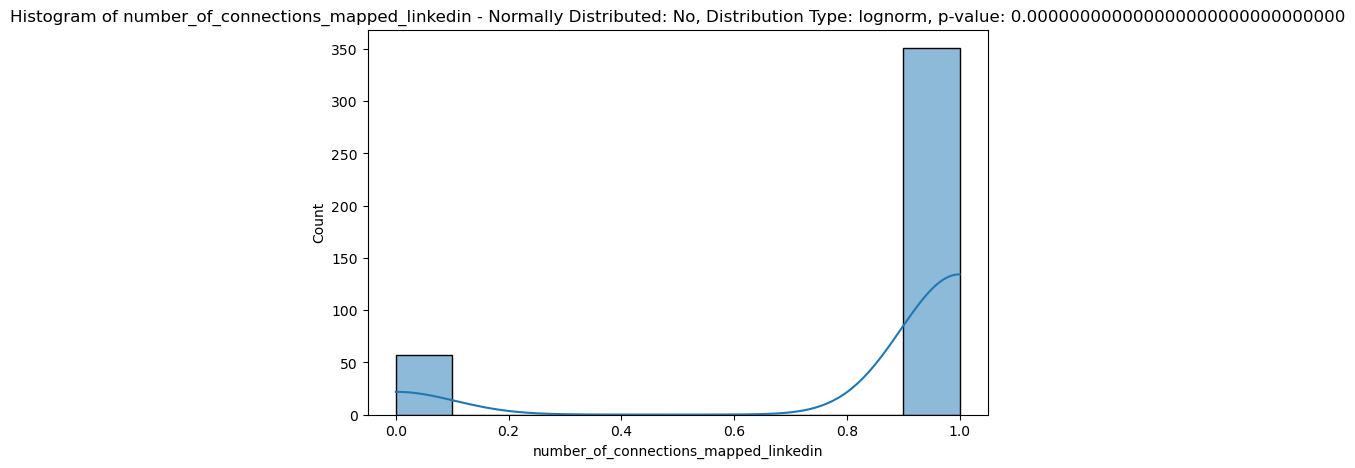

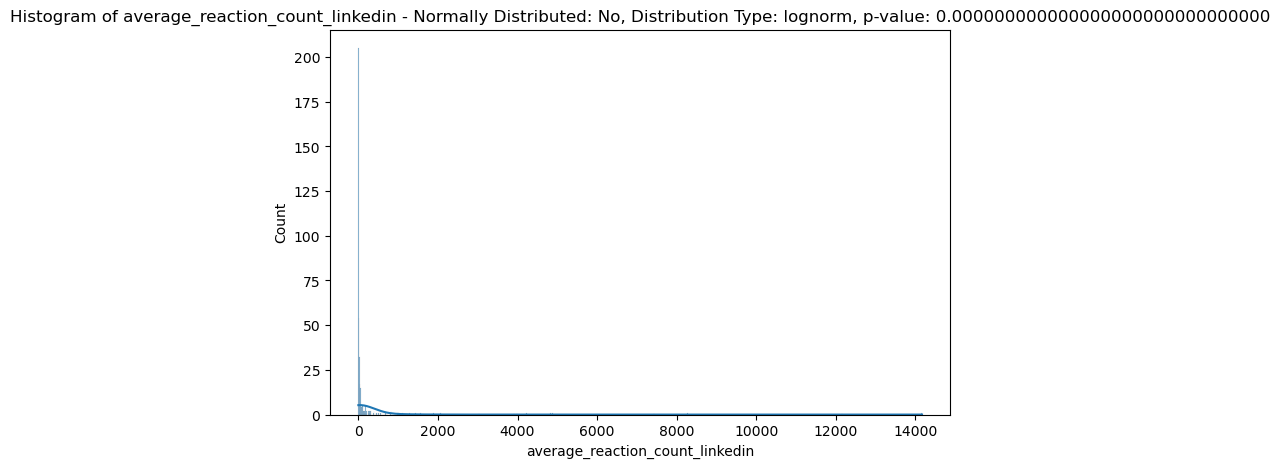

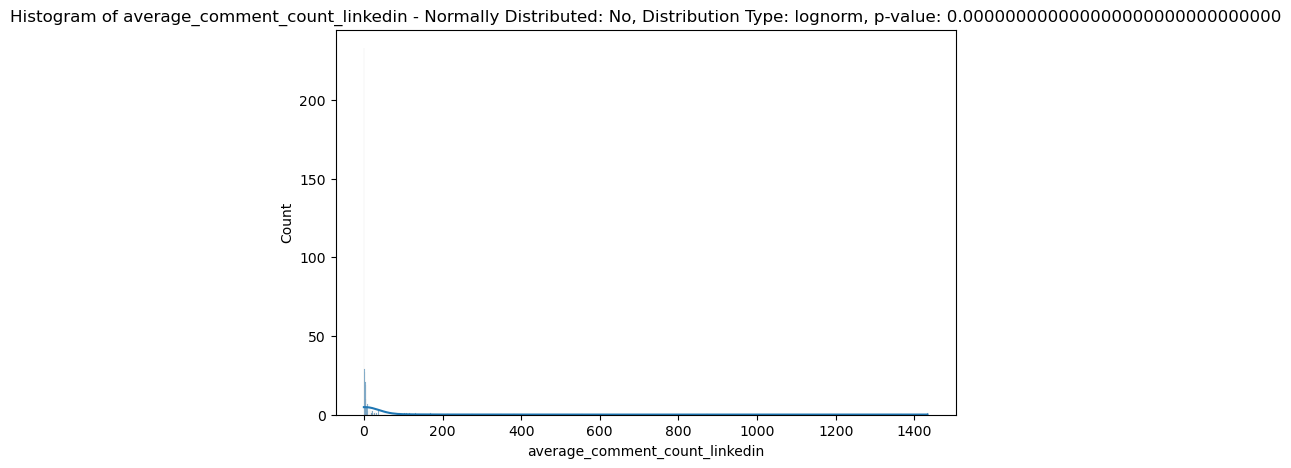

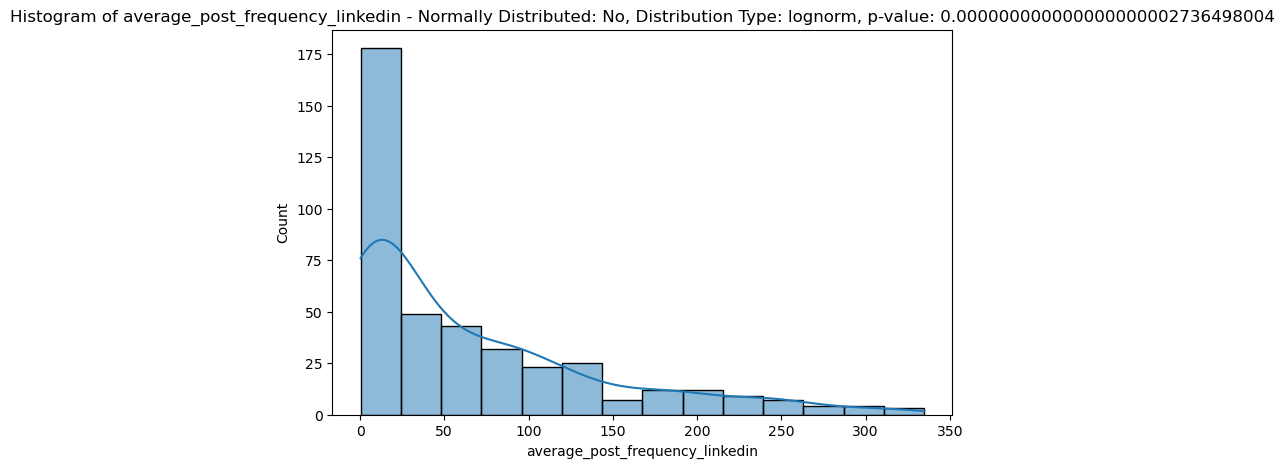

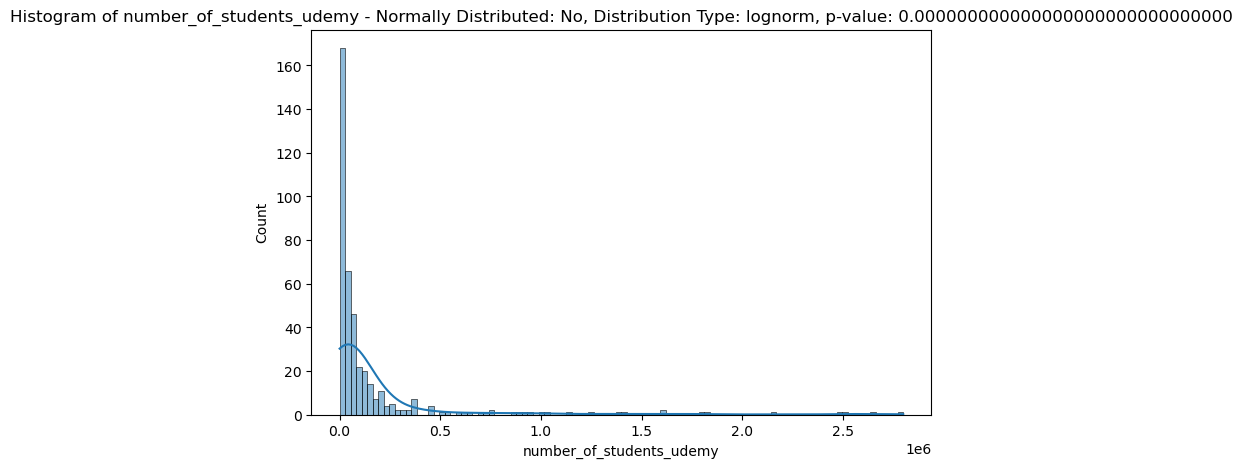

In [14]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Variable', 'Normally Distributed', 'Distribution Type', 'p-value'])

# Loop through each variable
for variable in predictors + [outcome]:
    # Perform normality test
    _, p_value = stats.normaltest(combined_df[variable].dropna())
    
    # Initialize variables for distribution information
    distribution_type = 'Unknown'
    
    # Check if the variable is normally distributed
    if p_value >= 0.05:
        distribution_type = 'Normal Distribution'
    else:
        # Identify distribution
        best_fit_name = None
        best_fit_params = None
        best_ks_stat = float('inf')
        
        # List of candidate distributions to fit (including chi-squared)
        distributions = [stats.expon, stats.lognorm, stats.weibull_min, stats.chi2]
        
        for dist in distributions:
            # Fit distribution to data
            params = dist.fit(combined_df[variable].dropna())
            ks_stat, _ = stats.kstest(combined_df[variable].dropna(), dist.cdf, args=params)
            
            # Update best fit if KS statistic is smaller
            if ks_stat < best_ks_stat:
                best_fit_name = dist.name
                best_fit_params = params
                best_ks_stat = ks_stat
        
        distribution_type = best_fit_name if best_fit_name is not None else 'Unknown'
    
    # Append the information to the results DataFrame
    results_df = pd.concat([results_df, pd.DataFrame({'Variable': [variable],
                                                      'Normally Distributed': ['Yes' if p_value >= 0.05 else 'No'],
                                                      'Distribution Type': [distribution_type],
                                                      'p-value': [p_value]})],
                           ignore_index=True)

    # Plot histogram with rounded p-value in the title
    plt.figure(figsize=(8, 5))
    sns.histplot(combined_df[variable], kde=True)
    plt.title(f'Histogram of {variable} - Normally Distributed: {results_df["Normally Distributed"].iloc[-1]}, Distribution Type: {distribution_type}, p-value: {p_value:.30f}')
    plt.show()

In [15]:
# Display the results DataFrame
results_df

,Variable,Normally Distributed,Distribution Type,p-value
0,instructor_rating_udemy,No,weibull_min,8.979781e-16
1,number_of_reviews_udemy,No,lognorm,6.498478e-118
2,number_of_courses_udemy,No,weibull_min,5.138717e-124
3,subscriber_count_youtube,No,lognorm,1.168636e-157
4,videos_posted_count_youtube,No,lognorm,1.117058e-133
5,channel_average_view_count_youtube,No,lognorm,1.090010e-144
6,featured_video_comments_count_youtube,No,lognorm,3.020030e-131
7,followers_count_linkedin,No,lognorm,3.138506e-115
8,number_of_connections_mapped_linkedin,No,lognorm,2.515312e-35
9,average_reaction_count_linkedin,No,lognorm,7.520455e-135


# Splitting the Data into Training and Validation

In [16]:
# Identify X and y variables for regression and partition data using 80% of records for training
# and 20% for validation (test_size=0.2). 
X = combined_df[predictors]
y = combined_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)
print('Number of rows and columns of predictors in training data set:', 
      train_X.shape)
print('Number of rows and columns of predictors in validation data set:', 
      valid_X.shape)
print('Number of rows of outcome variable in training data set:', 
      train_y.shape)
print('Number of rows of outcome variable in validation data set:', 
      valid_y.shape)

Number of rows and columns of predictors in training data set: (326, 12)
Number of rows and columns of predictors in validation data set: (82, 12)
Number of rows of outcome variable in training data set: (326,)
Number of rows of outcome variable in validation data set: (82,)


# Performing Log Transformations on the Outcome and predictors

In [17]:
# Log-transform the predictors in the training set
train_X_transformed = train_X.copy()
for predictor in predictors:
    train_X_transformed[predictor] = np.log1p(train_X_transformed[predictor])

# Log-transform the outcome variable in the training set
train_y_transformed = np.log1p(train_y)


# Log-transform the predictors in the validation set
valid_X_transformed = valid_X.copy()
for predictor in predictors:
    valid_X_transformed[predictor] = np.log1p(valid_X_transformed[predictor])

# Log-transform the outcome variable in the validation set
valid_y_transformed = np.log1p(valid_y)

# Checking the distribution of variables after transforming the data

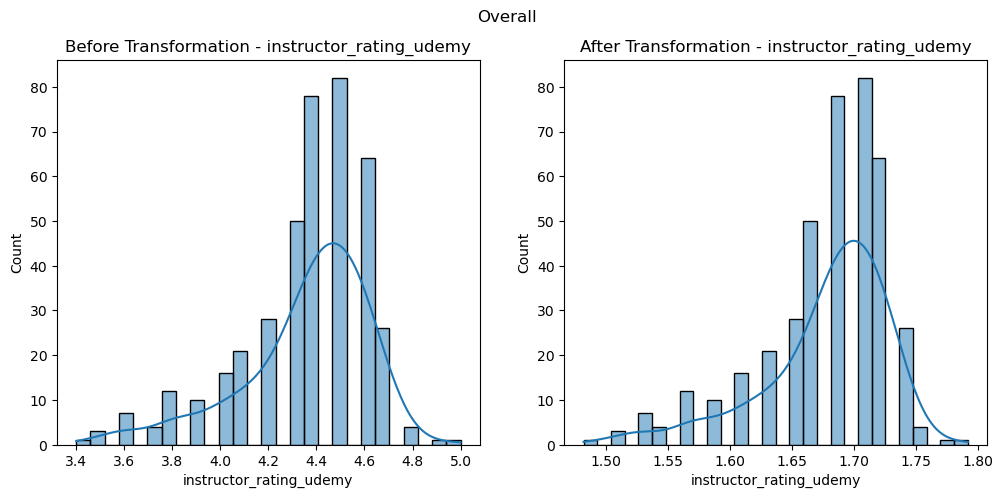

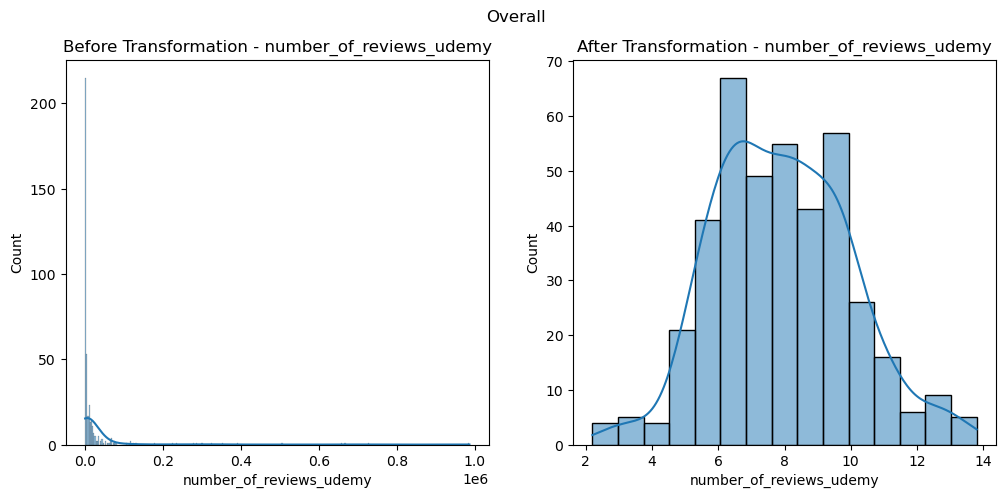

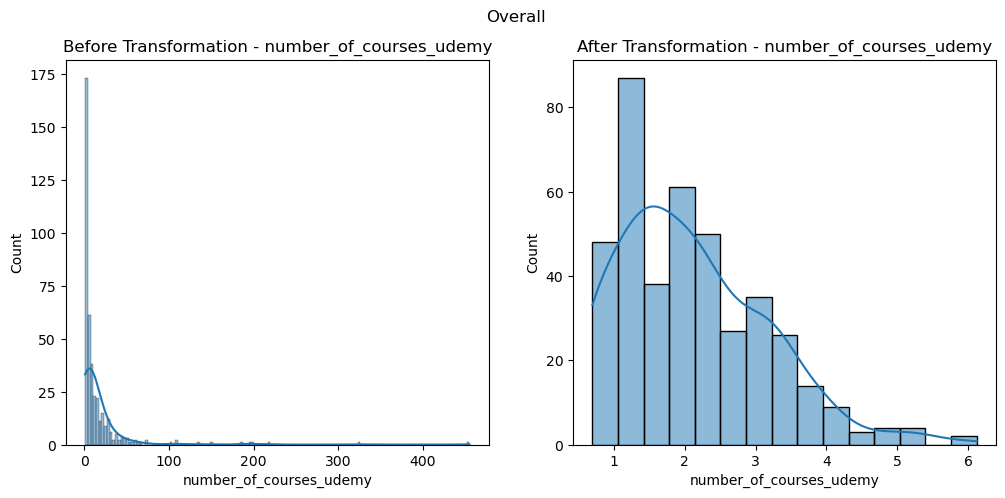

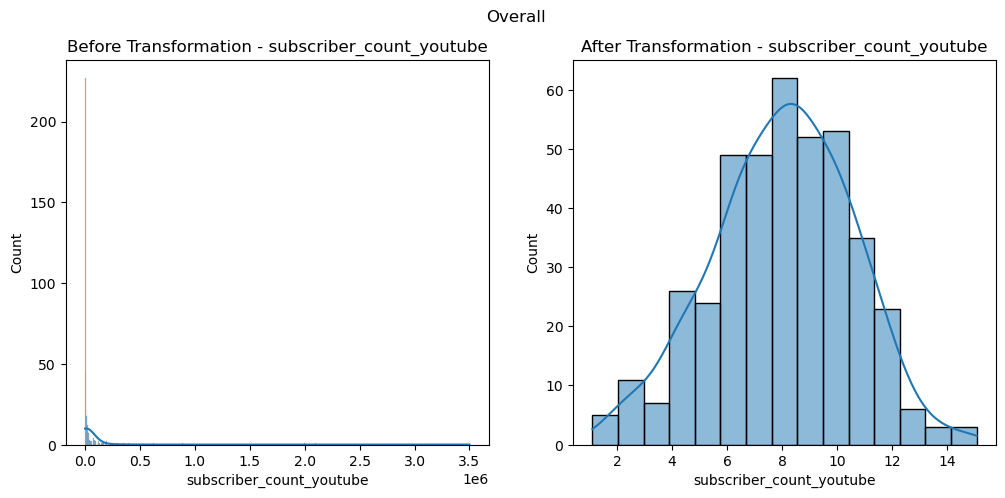

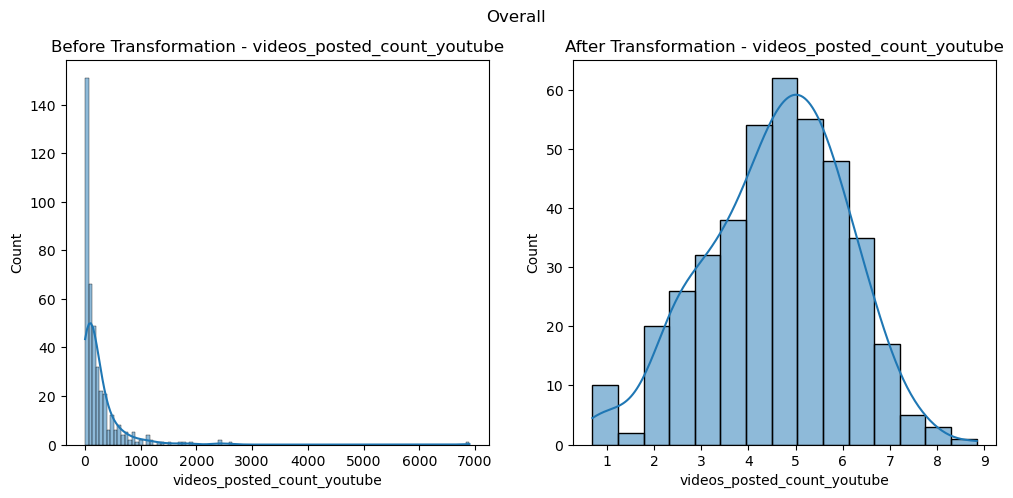

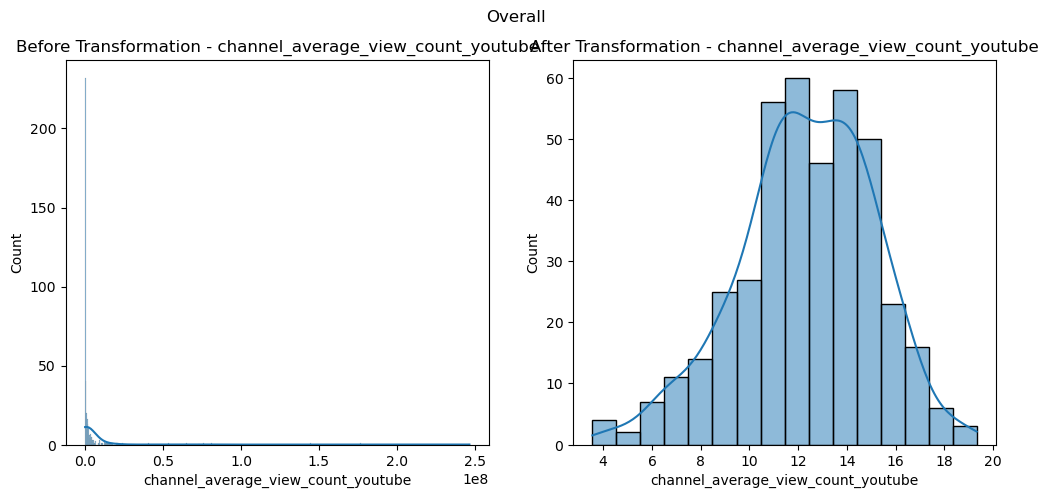

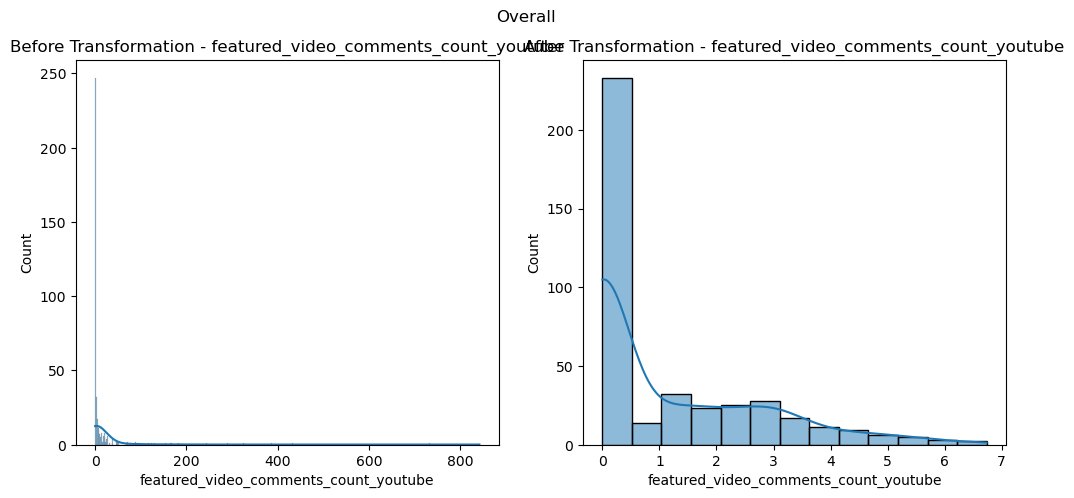

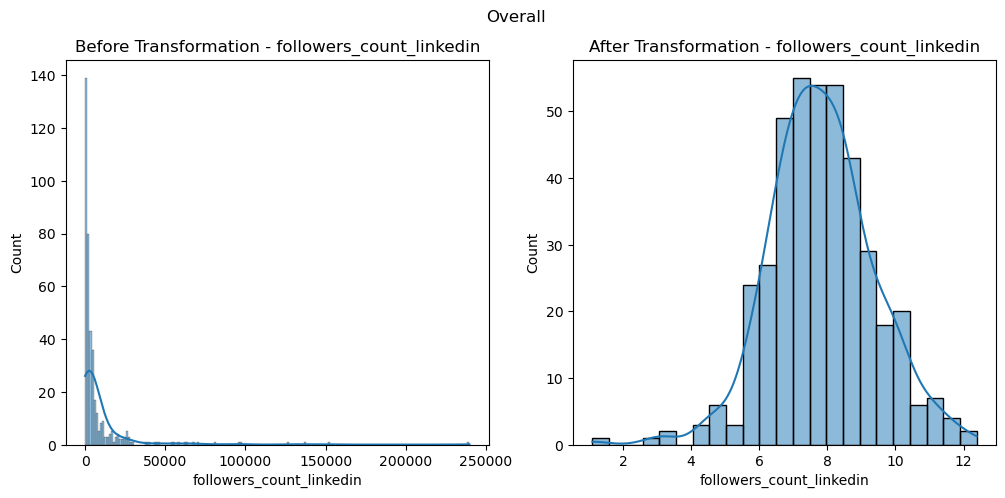

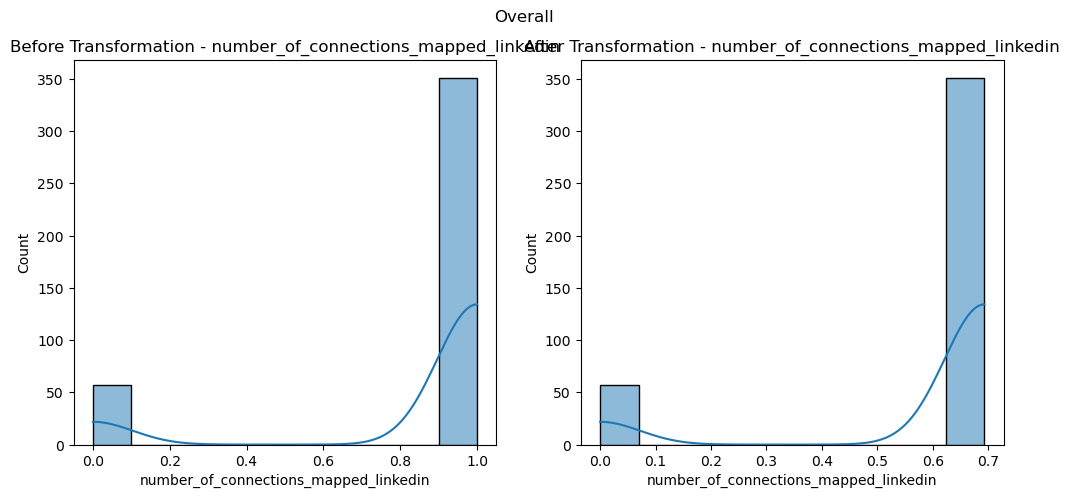

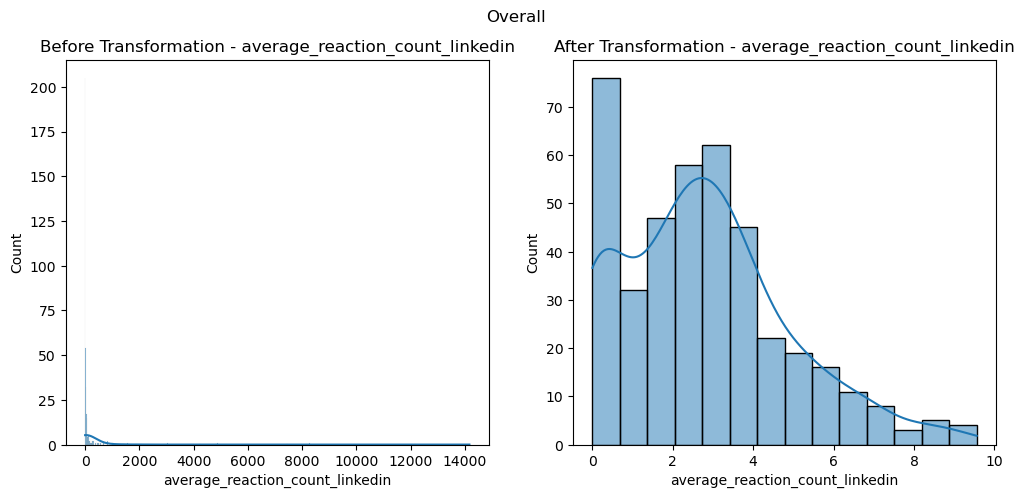

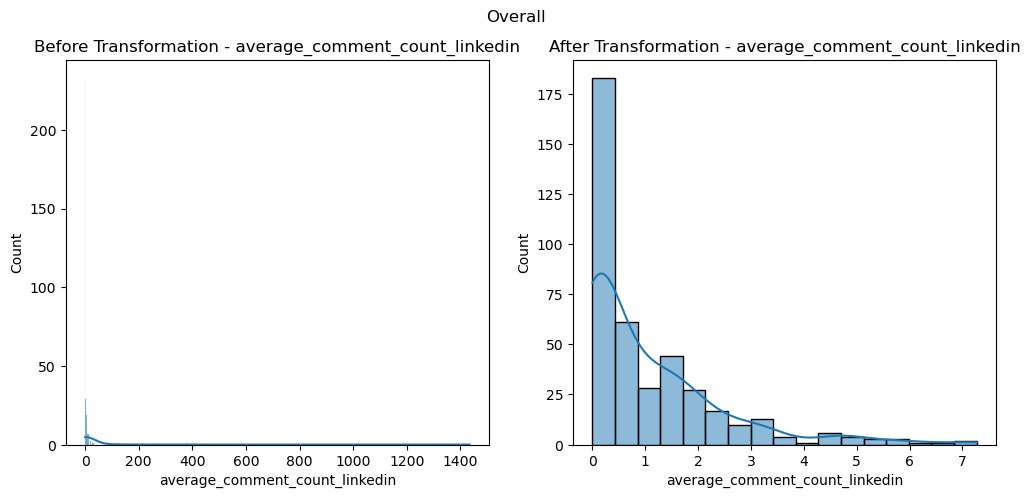

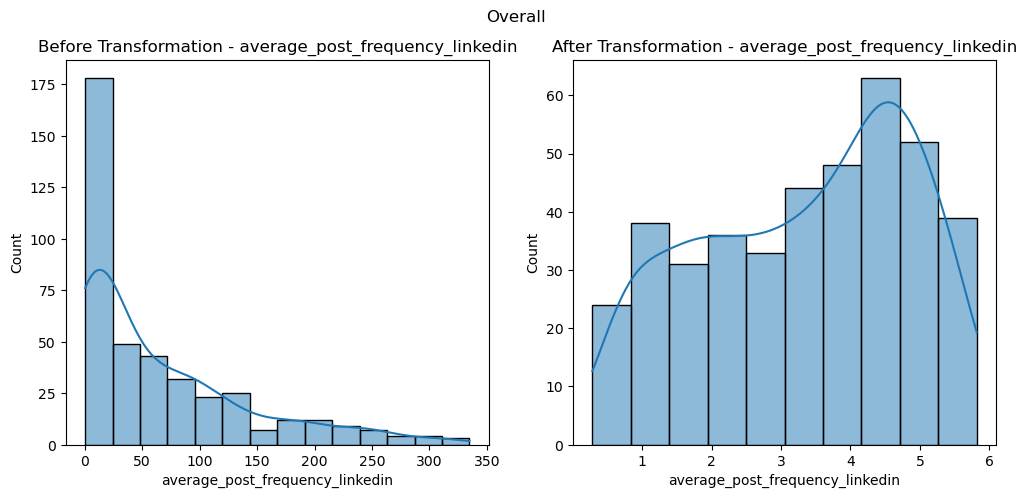

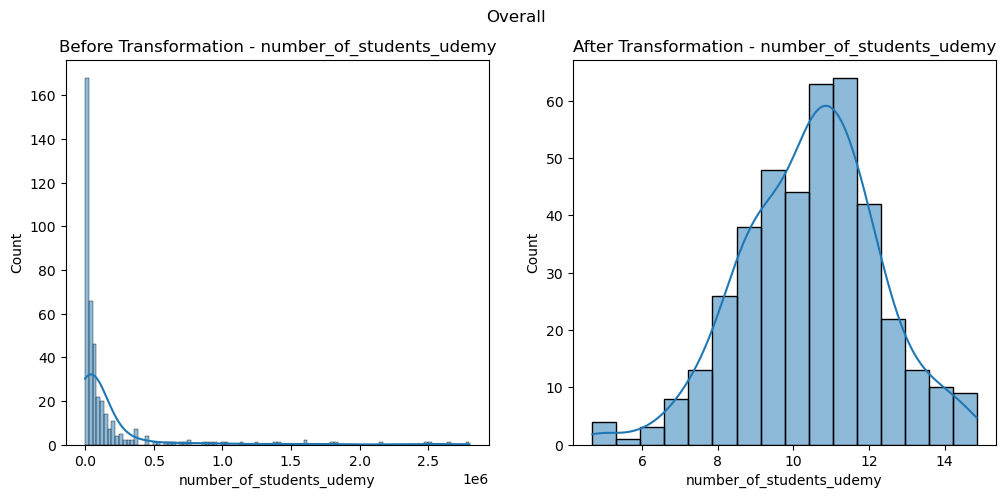

In [18]:
# Function to create side-by-side histograms for each variable in a DataFrame
def plot_variable_comparison(data_before, data_after, title):
    for column in data_before.columns:
        plt.figure(figsize=(12, 5))
        
        # Plot histogram before transformation
        plt.subplot(1, 2, 1)
        sns.histplot(data_before[column], kde=True)
        plt.title(f'Before Transformation - {column}')
        
        # Plot histogram after transformation
        plt.subplot(1, 2, 2)
        sns.histplot(data_after[column], kde=True)
        plt.title(f'After Transformation - {column}')

        plt.suptitle(title)
        plt.show()

# Combine training and validation sets for predictors
combined_X = pd.concat([train_X, valid_X], ignore_index=True)

# Combine training and validation sets for the outcome variable
combined_y = pd.concat([train_y, valid_y], ignore_index=True)

# Combine transformed training and validation sets for predictors
combined_X_transformed = pd.concat([train_X_transformed, valid_X_transformed], ignore_index=True)

# Combine transformed training and validation sets for the outcome variable
combined_y_transformed = pd.concat([train_y_transformed, valid_y_transformed], ignore_index=True)

# Plot side-by-side histograms for predictors overall
plot_variable_comparison(combined_X, combined_X_transformed, 'Overall')

# Plot side-by-side histogram for outcome variable overall
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(combined_y, kde=True)
plt.title(f'Before Transformation - {outcome}')
plt.subplot(1, 2, 2)
sns.histplot(combined_y_transformed, kde=True)
plt.title(f'After Transformation - {outcome}')
plt.suptitle('Overall')
plt.show()

# Developing Multiple Linear Regression Model on transformed data

In [19]:
# Create multiple linear regression model using X and y and LinearRegression() function from sklearn (skikit-learn) 
# library.
combined_lm = LinearRegression()
combined_lm.fit(train_X_transformed, train_y_transformed)

# Display intercept and regression coefficients. Round them to 2 decimals.
print('Regression Model for Combined Training Set')
print()
print('Intercept: ', np.round(combined_lm.intercept_, 2))
print(pd.DataFrame({'Predictor': X.columns, 'Coefficient': np.round(combined_lm.coef_, 2)}))

Regression Model for Combined Training Set

Intercept:  9.64
                                Predictor  Coefficient
0                 instructor_rating_udemy        -3.05
1                 number_of_reviews_udemy         0.79
2                 number_of_courses_udemy         0.11
3                subscriber_count_youtube        -0.03
4             videos_posted_count_youtube         0.12
5      channel_average_view_count_youtube        -0.05
6   featured_video_comments_count_youtube         0.05
7                followers_count_linkedin        -0.03
8   number_of_connections_mapped_linkedin         0.17
9         average_reaction_count_linkedin        -0.08
10         average_comment_count_linkedin         0.11
11        average_post_frequency_linkedin        -0.01


# Making Predictions

In [20]:
# Use predict() to score (make) predictions for validation set.
combined_lm_pred = combined_lm.predict(valid_X_transformed)

# Develop and display data frame with actual values of MVALUE, scoring (predicted) results, and residuals.
# Use round() function to round vlaues in data frame to 2 decimals. 
print('Actual, Prediction, and Residual no_of_students for Validation Set')
result = round(pd.DataFrame({'Actual': valid_y_transformed,'Predicted': combined_lm_pred, 
                       'Residual': valid_y_transformed - combined_lm_pred}), 2)

print(result.head(10))

Actual, Prediction, and Residual no_of_students for Validation Set
     Actual  Predicted  Residual
162   11.88      12.07     -0.19
199   10.65       8.88      1.76
400   10.95      10.77      0.18
20     7.92       8.82     -0.89
121   11.11      11.50     -0.39
202    9.45       8.27      1.18
317   10.80      11.66     -0.86
152    9.18       9.36     -0.18
11     8.30       7.28      1.03
360   10.92      11.29     -0.37


# Assumption 4 of Multiple Linear Regression - Normality of Residuals

In [21]:
# Check normality of residuals
_, p_value = stats.shapiro(result['Residual'])
if p_value < 0.05:
    print("Residuals are not normally distributed.")
else:
    print("Residuals are normally distributed.")

Residuals are normally distributed.


In [22]:
# Use predict() function to make predictions for training set.
pred_y = combined_lm.predict(train_X_transformed)

# Develop and display data frame with actual values of MVALUE, scoring (predicted) results, and residuals.
# Use round() function to round vlaues in data frame to 2 decimals. 
print('Actual, Prediction, and Residual no_of_students for Training Set')
result = round(pd.DataFrame({'Actual': train_y_transformed,'Predicted': pred_y, 
                       'Residual': train_y_transformed - pred_y}), 2)

print(result.head(10))

Actual, Prediction, and Residual no_of_students for Training Set
     Actual  Predicted  Residual
333    9.72      10.51     -0.79
341   10.99      10.17      0.82
258   10.76       9.42      1.34
96     9.07       9.56     -0.49
264   11.88      11.85      0.04
304   11.37      11.01      0.35
163   10.45       9.87      0.57
156    9.41       9.20      0.21
350   13.31      13.39     -0.08
256    9.20      10.21     -1.01


# Performance Metrics

In [23]:
# Create prediction performance measures for training set.
r2 = round(r2_score(train_y_transformed, pred_y),3)
adj_r2 = round(adjusted_r2_score(train_y_transformed, pred_y, combined_lm),3)
aic = round(AIC_score(train_y_transformed, pred_y, combined_lm),2)
bic = round(BIC_score(train_y_transformed, pred_y, combined_lm),2)

# Display prediction performance measures for training set.
print('Prediction Performance Measures for Training Set')
print('r2 : ', r2)
print('Adjusted r2 : ', adj_r2)
print('AIC : ', aic)
print('BIC : ', bic)
print() 

# Create prediction performance measures for validation set.
r2 = round(r2_score(valid_y_transformed, combined_lm_pred),3)
adj_r2 = round(adjusted_r2_score(valid_y_transformed, combined_lm_pred, combined_lm),3)
aic = round(AIC_score(valid_y_transformed, combined_lm_pred, combined_lm),2)
bic = round(BIC_score(valid_y_transformed, combined_lm_pred, combined_lm),2)

# Display prediction performance measures for validation set.
print('Prediction Performance Measures for Validation Set')
print('r2 : ', r2)
print('adjusted r2 : ', adj_r2)
print('AIC : ', aic)
print('BIC : ', bic)

Prediction Performance Measures for Training Set
r2 :  0.765
Adjusted r2 :  0.756
AIC :  873.2
BIC :  926.22

Prediction Performance Measures for Validation Set
r2 :  0.797
adjusted r2 :  0.762
AIC :  219.04
BIC :  252.73


In [24]:
# Display common accuracy measures for training set.
print('Accuracy Measures for Training Set - All Variables')
regressionSummary(train_y_transformed, pred_y)
print()

# Display common accuracy measures for validation set.
print('Accuracy Measures for Validation Set - All Variables')
regressionSummary(valid_y_transformed, combined_lm_pred)

Accuracy Measures for Training Set - All Variables

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.8846
            Mean Absolute Error (MAE) : 0.7110
          Mean Percentage Error (MPE) : -0.9585
Mean Absolute Percentage Error (MAPE) : 7.4740

Accuracy Measures for Validation Set - All Variables

Regression statistics

                      Mean Error (ME) : 0.0008
       Root Mean Squared Error (RMSE) : 0.7756
            Mean Absolute Error (MAE) : 0.6122
          Mean Percentage Error (MPE) : -0.4235
Mean Absolute Percentage Error (MAPE) : 6.3693


# Back Transformation

In [25]:
# Back-transform predictions for the validation set to the original scale
combined_lm_pred_valid_back = np.expm1(combined_lm_pred)

# Develop and display data frame with actual values, predictions, and residuals for the validation set
result_valid = round(pd.DataFrame({'Actual': valid_y, 'Predicted': combined_lm_pred_valid_back, 'Residual': valid_y - combined_lm_pred_valid_back}), 2)
print('Actual, Prediction, and Residual Values for Validation Set')
print(result_valid.head(10))

Actual, Prediction, and Residual Values for Validation Set
     Actual  Predicted  Residual
162  144489  174312.88 -29823.88
199   42069    7211.21  34857.79
400   56697   47448.39   9248.61
20     2764    6765.79  -4001.79
121   66759   98599.44 -31840.44
202   12769    3909.51   8859.49
317   48970  115499.42 -66529.42
152    9718   11619.96  -1901.96
11     4042    1448.48   2593.52
360   55275   79697.65 -24422.65


In [26]:
# Back-transform predictions for the training set to the original scale
combined_lm_pred_train_back = np.expm1(pred_y)

# Develop and display data frame with actual values, predictions, and residuals for the training set
result_train = round(pd.DataFrame({'Actual': train_y, 'Predicted': combined_lm_pred_train_back, 'Residual': train_y - combined_lm_pred_train_back}), 2)
print('\nActual, Prediction, and Residual Values for Training Set')
print(result_train.head(10))


Actual, Prediction, and Residual Values for Training Set
     Actual  Predicted  Residual
333   16655   36690.05 -20035.05
341   59493   26176.29  33316.71
258   47155   12343.28  34811.72
96     8706   14184.50  -5478.50
264  144869  139841.20   5027.80
304   86477   60743.93  25733.07
163   34378   19383.20  14994.80
156   12246    9944.96   2301.04
350  605346  656587.22 -51241.22
256    9856   27152.28 -17296.28


# Performance metrics of the model after back transformation

In [27]:
# Create prediction performance measures for training set on the original scale
r2 = round(r2_score(train_y, combined_lm_pred_train_back), 3)
adj_r2 = round(adjusted_r2_score(train_y, combined_lm_pred_train_back, combined_lm), 3)
aic = round(AIC_score(train_y, combined_lm_pred_train_back, combined_lm), 2)
bic = round(BIC_score(train_y, combined_lm_pred_train_back, combined_lm), 2)

# Display prediction performance measures for training set on the original scale
print('Prediction Performance Measures for Training Set (Original Scale)')
print('r2 : ', r2)
print('Adjusted r2 : ', adj_r2)
print('AIC : ', aic)
print('BIC : ', bic)
print()

# Create prediction performance measures for validation set on the original scale
r2 = round(r2_score(valid_y, combined_lm_pred_valid_back), 3)
adj_r2 = round(adjusted_r2_score(valid_y, combined_lm_pred_valid_back, combined_lm), 3)
aic = round(AIC_score(valid_y, combined_lm_pred_valid_back, combined_lm), 2)
bic = round(BIC_score(valid_y, combined_lm_pred_valid_back, combined_lm), 2)

# Display prediction performance measures for validation set on the original scale
print('Prediction Performance Measures for Validation Set (Original Scale)')
print('r2 : ', r2)
print('adjusted r2 : ', adj_r2)
print('AIC : ', aic)
print('BIC : ', bic)

Prediction Performance Measures for Training Set (Original Scale)
r2 :  0.92
Adjusted r2 :  0.917
AIC :  8497.07
BIC :  8550.09

Prediction Performance Measures for Validation Set (Original Scale)
r2 :  0.95
adjusted r2 :  0.942
AIC :  2099.25
BIC :  2132.95


In [28]:
# Display common accuracy measures for training set.
print('Accuracy Measures for Training Set - All Variables')
regressionSummary(train_y, combined_lm_pred_train_back)
print()

# Display common accuracy measures for validation set.
print('Accuracy Measures for Validation Set - All Variables')
regressionSummary(valid_y, combined_lm_pred_valid_back)

Accuracy Measures for Training Set - All Variables

Regression statistics

                      Mean Error (ME) : 13993.5532
       Root Mean Squared Error (RMSE) : 105919.5226
            Mean Absolute Error (MAE) : 49298.3300
          Mean Percentage Error (MPE) : -43.0344
Mean Absolute Percentage Error (MAPE) : 86.2599

Accuracy Measures for Validation Set - All Variables

Regression statistics

                      Mean Error (ME) : 5424.0002
       Root Mean Squared Error (RMSE) : 73913.8488
            Mean Absolute Error (MAE) : 39544.8030
          Mean Percentage Error (MPE) : -31.1085
Mean Absolute Percentage Error (MAPE) : 69.2976


# Predicting New data

In [32]:
# Assuming 'predictors' is the list of predictor variables used in your original analysis
predictors = ['instructor_rating_udemy', 'number_of_reviews_udemy','number_of_courses_udemy', 'subscriber_count_youtube',
              'videos_posted_count_youtube', 'channel_average_view_count_youtube','featured_video_comments_count_youtube',
              'followers_count_linkedin', 'number_of_connections_mapped_linkedin','average_reaction_count_linkedin',
             'average_comment_count_linkedin','average_post_frequency_linkedin']

new_data = pd.DataFrame({
           'instructor_rating_udemy': [4.4,4.8,4.5],  
            'number_of_reviews_udemy': [10000,20000, 124359],
            'number_of_courses_udemy': [56, 67,37],
            'subscriber_count_youtube': [1800, 24500,24500],
            'videos_posted_count_youtube': [45, 678,544],  
            'channel_average_view_count_youtube': [193751, 8750786, 3524395],  
            'featured_video_comments_count_youtube': [5, 20, 5],  
            'followers_count_linkedin': [1015, 38002, 7764],
            'number_of_connections_mapped_linkedin': [1, 1,1],  
            'average_reaction_count_linkedin': [52.67, 96.67, 96.67],
            'average_comment_count_linkedin': [0.67, 1.33, 3.67],  
            'average_post_frequency_linkedin': [1.00, 6.33, 27.29]

})

# Assuming 'combined_lm' is the trained linear regression model
# Log-transform the new data
new_data_transformed = new_data.copy()
for predictor in predictors:
    new_data_transformed[predictor] = np.log1p(new_data_transformed[predictor])

# Make predictions using the trained model
new_predictions_transformed = combined_lm.predict(new_data_transformed)

# Back-transform the predictions to the original scale and round off
new_predictions_back = np.round(np.expm1(new_predictions_transformed))

# Display the predictions along with original predictors
new_predictions_df = pd.DataFrame({'predicted_number_of_students_udemy': new_predictions_back})
new_predictions_df = pd.concat([new_data, new_predictions_df], axis=1)
print(new_predictions_df)

   instructor_rating_udemy  number_of_reviews_udemy  number_of_courses_udemy  \
0                      4.4                    10000                       56   
1                      4.8                    20000                       67   
2                      4.5                   124359                       37   

   subscriber_count_youtube  videos_posted_count_youtube  \
0                      1800                           45   
1                     24500                          678   
2                     24500                          544   

   channel_average_view_count_youtube  featured_video_comments_count_youtube  \
0                              193751                                      5   
1                             8750786                                     20   
2                             3524395                                      5   

   followers_count_linkedin  number_of_connections_mapped_linkedin  \
0                      1015                    